Dataset shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Target distribution:
target
1    526
0    499
Name: count, dtype: int64

Logistic Regression Accuracy: 81.46%
Decision Tree Accuracy: 98.54%

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy       

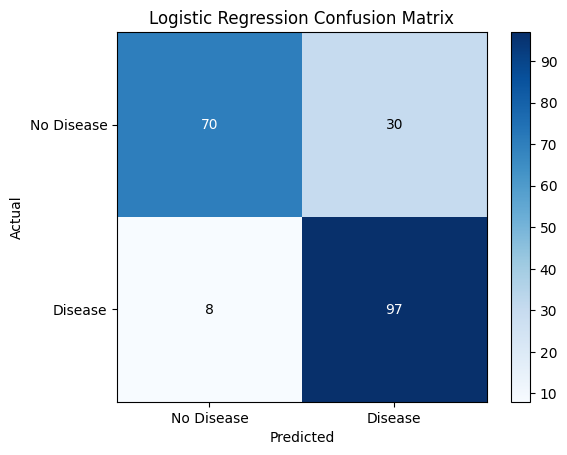

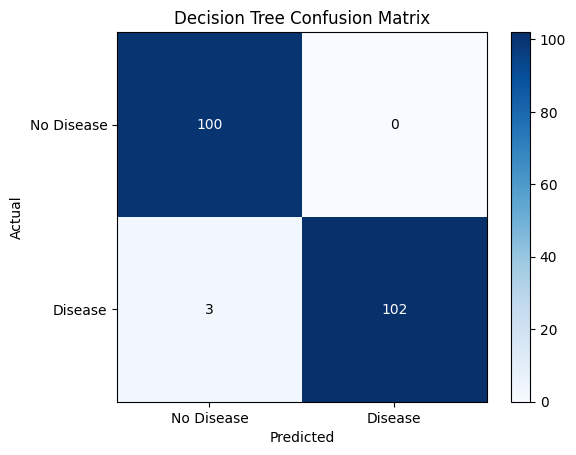

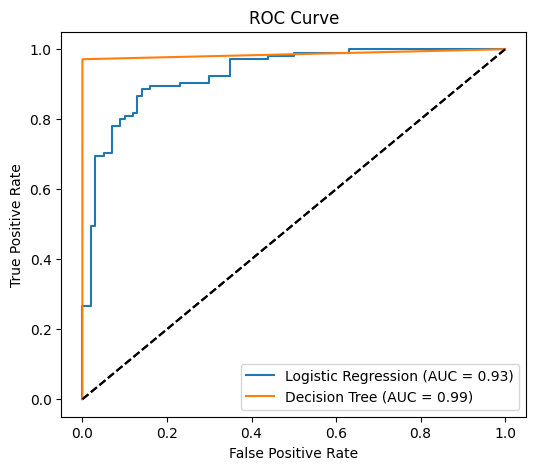


Logistic Regression AUC: 0.930
Decision Tree AUC: 0.986


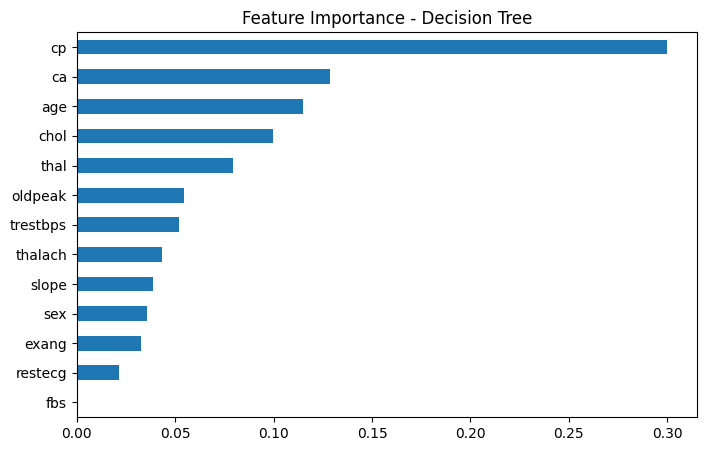

In [5]:
# Heart Disease Prediction - Internship Task 3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

# Load dataset
df = pd.read_csv("heart.csv")

# Basic info
print("Dataset shape:", df.shape)
print(df.head())

# Check target distribution
print("\nTarget distribution:")
print(df['target'].value_counts())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Accuracy
log_acc = accuracy_score(y_test, y_pred_log)
tree_acc = accuracy_score(y_test, y_pred_tree)
print(f"\nLogistic Regression Accuracy: {log_acc:.2%}")
print(f"Decision Tree Accuracy: {tree_acc:.2%}")

# Classification reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, cmap="Blues")
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ["No Disease", "Disease"])
    plt.yticks([0, 1], ["No Disease", "Disease"])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center',
                     color="white" if cm[i, j] > cm.max()/2 else "black")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ROC Curve function
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{title} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    return roc_auc

# Confusion matrices
plot_conf_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, y_pred_tree, "Decision Tree Confusion Matrix")

# ROC curves for both models
plt.figure(figsize=(6, 5))
auc_log = plot_roc_curve(y_test, y_prob_log, "Logistic Regression")
auc_tree = plot_roc_curve(y_test, y_prob_tree, "Decision Tree")
plt.show()

print(f"\nLogistic Regression AUC: {auc_log:.3f}")
print(f"Decision Tree AUC: {auc_tree:.3f}")

# Feature Importance (Decision Tree)
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance - Decision Tree")
plt.show()


# New Section